# transported estimation by using MultinomialNB

# data analysis

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df1=pd.read_csv("test.csv")

In [5]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df.shape

(8693, 14)

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df=df.dropna(axis=0)

In [9]:
df["Cabin"].nunique()

5305

In [10]:
df["Transported"] = df["Transported"].map({True:1,False:0})


In [11]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [12]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [13]:
df[df["Cabin"]==df["Cabin"][4]]["Transported"].mean()

1.0

In [14]:
df = df.reset_index(drop=True)


In [15]:
l=[]
for i in range(len(df["Cabin"])):
    l.append(df[df["Cabin"]==df["Cabin"][i]]["Transported"].mean())
    



df["Cabin1"]=l



In [16]:
l=[]
for i in df1["Cabin"]:
    l.append(df[df["Cabin"]==i]["Cabin1"].mean())


df1["Cabin"]=l    

In [17]:
df["Cabin"]=df["Cabin1"]

In [18]:
df=df.drop("Cabin1",axis=1)

In [19]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,0.0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,1.0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,0.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,0.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,1.0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [20]:
df=df.drop(["PassengerId","Name"],axis=1)

In [21]:
df=pd.get_dummies(df)

In [22]:
df.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0,False,True,False,True,False,False,False,True,True,False
1,1.0,24.0,109.0,9.0,25.0,549.0,44.0,1,True,False,False,True,False,False,False,True,True,False
2,0.0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,False,True,False,True,False,False,False,True,False,True
3,0.0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,False,True,False,True,False,False,False,True,True,False
4,1.0,16.0,303.0,70.0,151.0,565.0,2.0,1,True,False,False,True,False,False,False,True,True,False


In [23]:
df.corr(numeric_only=True)

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
Cabin,1.000000,-0.049312,-0.221549,0.070470,0.021685,-0.152279,-0.144632,0.912029,-0.185132,0.199559,0.013549,-0.418390,0.418390,0.120544,0.002257,-0.108400,0.016502,-0.016502
Age,-0.049312,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553,-0.211611,0.227537,0.016093,0.085701,-0.085701,0.018652,-0.024093,-0.001289,-0.098138,0.098138
RoomService,-0.221549,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291,-0.142515,-0.084779,0.266348,0.255398,-0.255398,-0.033266,-0.061899,0.068730,-0.029009,0.029009
FoodCourt,0.070470,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025,-0.220969,0.374625,-0.130290,0.210782,-0.210782,0.133108,-0.066713,-0.075860,-0.135386,0.135386
ShoppingMall,0.021685,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602,-0.082129,-0.024580,0.127432,0.228612,-0.228612,-0.009219,-0.034535,0.030057,-0.013660,0.013660
Spa,-0.152279,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854,-0.160363,0.266354,-0.088629,0.202216,-0.202216,0.077554,-0.055403,-0.033725,-0.064792,0.064792
VRDeck,-0.144632,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950,-0.158738,0.290047,-0.116061,0.199095,-0.199095,0.090918,-0.047422,-0.050640,-0.130061,0.130061
Transported,0.912029,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000,-0.168845,0.182004,0.012357,-0.462803,0.462803,0.123783,0.001281,-0.110655,0.042260,-0.042260
HomePlanet_Earth,-0.185132,-0.211611,-0.142515,-0.220969,-0.082129,-0.160363,-0.158738,-0.168845,1.000000,-0.630734,-0.553240,0.107303,-0.107303,-0.153941,0.240784,-0.015918,0.171725,-0.171725
HomePlanet_Europa,0.199559,0.227537,-0.084779,0.374625,-0.024580,0.266354,0.290047,0.182004,-0.630734,1.000000,-0.297476,-0.097172,0.097172,0.294744,-0.167674,-0.155341,-0.155231,0.155231


In [24]:
import pandas as pd

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

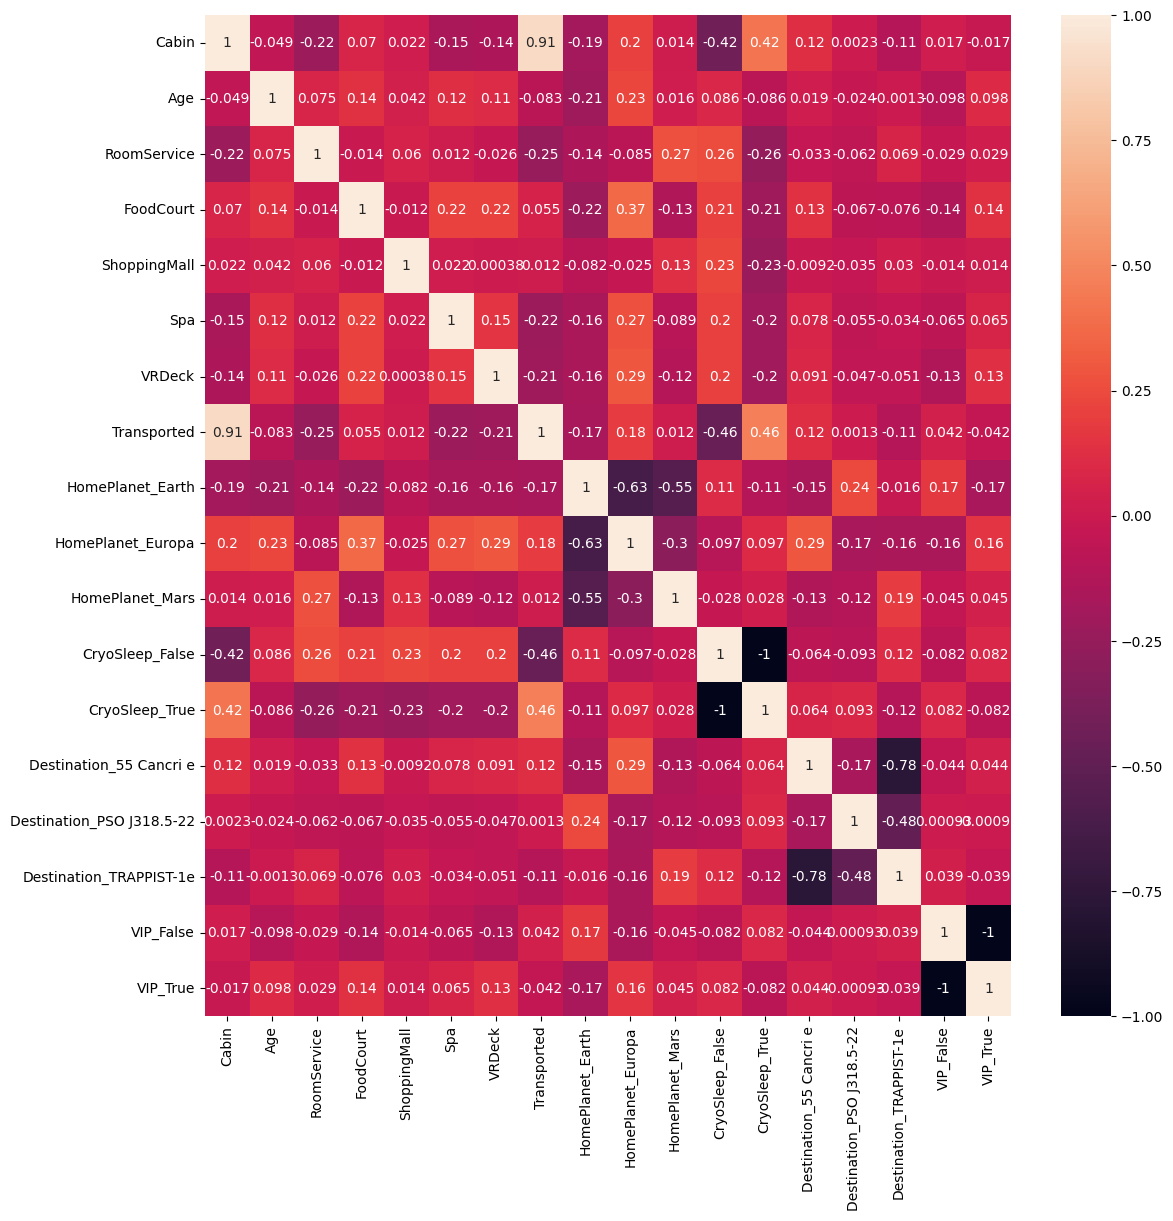

In [26]:
plt.figure(figsize=[13,13])
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [27]:
l=[]
for i in df.corr(numeric_only=True):
    if -0.1<df.corr(numeric_only=True)[i][7]<0.1:
        l.append(i)






df=df.drop(l,axis=1)        

C:\Users\yso05\AppData\Local\Temp\ipykernel_19080\3892593674.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if -0.1<df.corr(numeric_only=True)[i][7]<0.1:


In [28]:
df.head()

,Cabin,RoomService,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_TRAPPIST-1e
0,0.0,0.0,0.0,0.0,0,False,True,True,False,False,True
1,1.0,109.0,549.0,44.0,1,True,False,True,False,False,True
2,0.0,43.0,6715.0,49.0,0,False,True,True,False,False,True
3,0.0,0.0,3329.0,193.0,0,False,True,True,False,False,True
4,1.0,303.0,565.0,2.0,1,True,False,True,False,False,True


# model training

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
mb=MultinomialNB()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df1=pd.get_dummies(df1)

In [33]:
l=[]
for i in df1.columns:
    if i not in df.columns:
        l.append(i)


df1=df1.drop(l,axis=1)







In [34]:
df1.isnull().sum()

Cabin                      4277
RoomService                  82
Spa                         101
VRDeck                       80
HomePlanet_Earth              0
HomePlanet_Europa             0
CryoSleep_False               0
CryoSleep_True                0
Destination_55 Cancri e       0
Destination_TRAPPIST-1e       0
dtype: int64

In [35]:
df1["Cabin"]=df1["Cabin"].fillna(0.5)

In [36]:
df1["RoomService"]=df1["RoomService"].fillna(df1["RoomService"].mean())

In [37]:
df1["Spa"]=df1["Spa"].fillna(df1["Spa"].mean())

In [38]:
df1["VRDeck"]=df1["VRDeck"].fillna(df1["VRDeck"].mean())

In [39]:
x=df.drop("Transported",axis=1)

In [40]:
y=df[["Transported"]]

In [41]:
model=mb.fit(x,y)

c:\Users\yso05\Documents\AI\day9\.conda\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [43]:
model1=mb.fit(x_train,y_train)
pred=model1.predict(x_test)

c:\Users\yso05\Documents\AI\day9\.conda\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(pred,y_test)

0.6641452344931922

# we estimated by 0.66 score

In [46]:
pre=model.predict(df1)

In [47]:
df2=pd.read_csv("test.csv")

In [48]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [49]:
df2["Transported"]=pre

In [50]:
df2=df2[["PassengerId","Transported"]]

In [51]:
df2.to_csv("data.csv",index=False)

In [52]:
df2.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,1
